In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [15]:
#定义加载数据的文件名
filename = "anjuke-m1041.csv"
#自定义数据的行列索引（行索引使用pd默认的，列索引使用自定义的）
names = [
        "house_name","house_type","house_zone","house_address","price","house_area","house_location",
        ]
#自定义需要处理的缺失值标记列表
miss_value = ["null","暂无数据"]

In [16]:
#数据类型会自动转换
#使用自定义的列名，跳过文件中的头行，处理缺失值列表标记的缺失值
df = pd.read_csv(filename,skiprows=[0],names=names,na_values=miss_value,encoding='gbk') #skiprows=[0]， 跳过文件中的头行

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


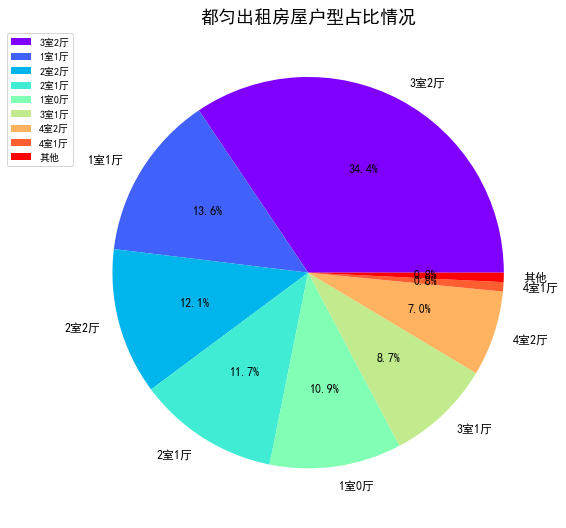

In [17]:
 """都匀出租房房屋户型占比情况"""
count_housetype = df['house_type'].value_counts()[:8]
count_other_housetype = pd.Series({"其他":df['house_type'].value_counts()[8:].count()})
count_housetype =count_housetype.append(count_other_housetype)
count_housetype.index.name =""
count_housetype.name=""
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.set_title("都匀出租房屋户型占比情况",fontsize=18)
count_housetype.plot(kind="pie",cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=12)
plt.legend(bbox_to_anchor=(0.03,1))
fig.savefig("resources/housebase/都匀出租房屋户型占比情况.jpg",format='jpg')
fig.show()

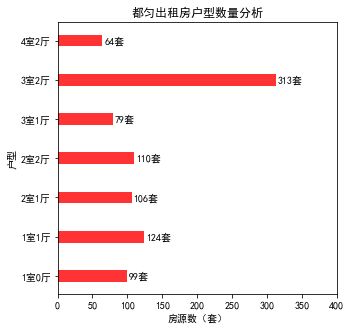

In [18]:
"""户型数量分析和对户型进行分组"""
group_type = df.groupby('house_type').count()
housetype = group_type['house_zone'].reset_index()
housetype.rename(columns={'house_zone':'num'},inplace =True)
house_types = housetype[housetype['num']>20]
group_type = df.groupby('house_type').count()
housetype = group_type['house_zone'].reset_index()
housetype.rename(columns={'house_zone':'num'},inplace =True)
house_types = housetype[housetype['num']>20]
type = house_types['house_type'] #户型
num =  house_types['num'].values    #户型对应的均价
#绘图
fig = plt.figure(figsize=(5,5))
plt.barh(type,num,height=0.3,color='r',alpha=0.8)   #从下往上画水平条形图
plt.xlim(0,400)
plt.xlabel('房源数（套）')
plt.ylabel('户型')
plt.title("都匀出租房户型数量分析")
#为每一个图形加数值标签
for y,x in enumerate(num):
    x = round(x)
    plt.text(x+3,y,str(x)+'套',va='center')
fig.savefig("resources/housebase/都匀出租房户型数量分析.jpg", format='jpg')
plt.show()


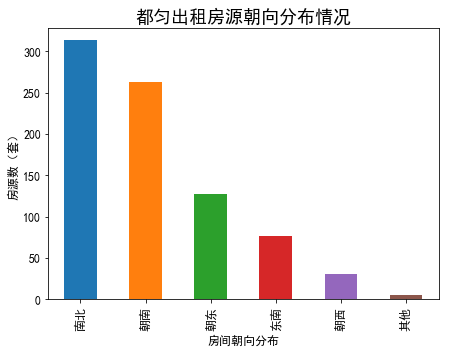

In [19]:
"""都匀出租房屋朝向分布情况"""
count_fwcx = df["house_location"].value_counts()[:5]
count_other_fwcx = pd.Series({"其他":df['house_location'].value_counts()[5:].count()})
count_fwcx = count_fwcx.append(count_other_fwcx)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.set_ylabel("房源数（套）",fontsize=12)
ax.set_xlabel("房间朝向分布",fontsize=12)
ax.set_title("都匀出租房源朝向分布情况",fontsize=18)
count_fwcx.plot(kind="bar",fontsize=12)
fig.savefig("resources/housebase/都匀出租房源朝向分布情况.jpg", format='jpg')
plt.show()

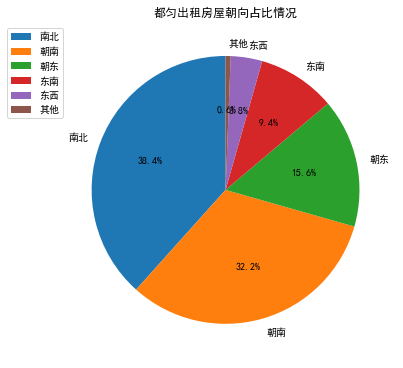

In [20]:
"""都匀出租房屋朝向占比情况"""
elevator_count =df['house_location'].value_counts().sort_values(ascending=False)[:5]
elevator_other_count= pd.Series({"其他":df['house_location'].value_counts()[5:].count()})
elevator_count = elevator_count.append(count_other_fwcx)
fig = plt.figure(figsize=(6,7))
plt.title("都匀出租房屋朝向占比情况")
plt.pie(elevator_count, labels=elevator_count.index, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(0.03,1))
fig.savefig("resources/housebase/都匀出租房屋朝向占比情况.jpg", format='jpg')
plt.show()

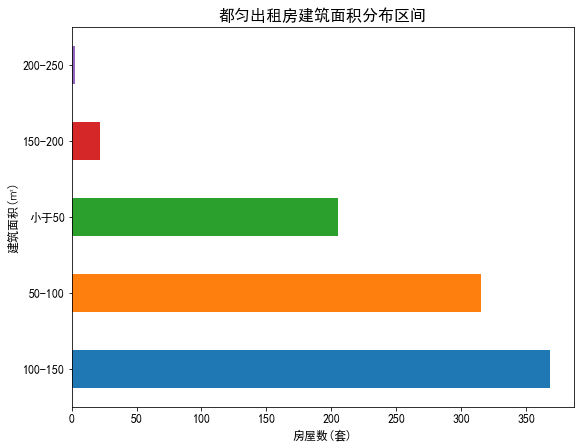

In [21]:
"""都匀出租房房建筑面积分布区间"""
area_level = [0, 50, 100, 150, 200, 250]
label_level = ['小于50', '50-100', '100-150', '150-200', '200-250']
jzmj_cut = pd.cut(df["house_area"], area_level, labels=label_level)
jzmj_result = jzmj_cut.value_counts()
#jzmj_result = jzmj_result.sort_values()

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.set_ylabel("建筑面积(㎡)",fontsize=12)
ax.set_xlabel("房屋数(套)",fontsize=12)
ax.set_title("都匀出租房建筑面积分布区间",fontsize=16)
jzmj_result.plot(kind="barh",fontsize=12)
fig.savefig("resources/housebase/都匀出租房房建筑面积分布区间.jpg", format='jpg')
plt.show()


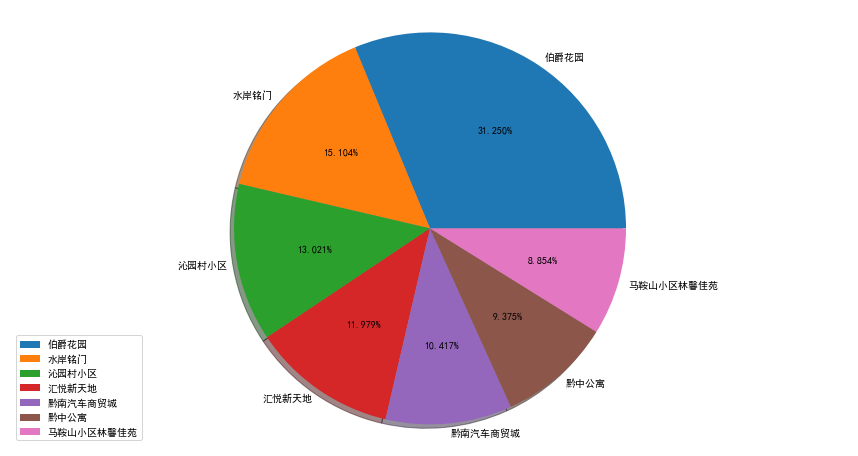

In [28]:
"""各小区出租房及占比分析"""
group_number = df.groupby('house_zone').size()  #房子小区分组数量
sort_values = group_number.sort_values(ascending=False) #进行降序
top_seven = sort_values.head(7)
region = group_number[top_seven .index].index   # 小区名称
numbers = group_number[top_seven .index].values   #获取每个区域内房子出售的数量
percentage = numbers / numbers.sum()*100         #获取每个区域内
#绘制图形
fig = plt.figure(figsize=(15,8))
plt.pie(percentage,labels=region,labeldistance=1.05,autopct='%1.3f%%',shadow=True,startangle=0,pctdistance=0.6)
plt.axis('equal')
###plt.title('小区出租房数量所占比例',fontsize=12)
plt.legend(bbox_to_anchor=(0,0),loc="lower left")  #让图例生效，并设置图例显示位置
fig.savefig("resources/housebase/各小区出租房数量所占比例.jpg", format='jpg')
plt.show()
fig.savefig('图1都匀各热门小区出租房及占比分析.png')
plt.show()                 
fig.savefig('图1都匀各热门小区出租房及占比分析.pdf')

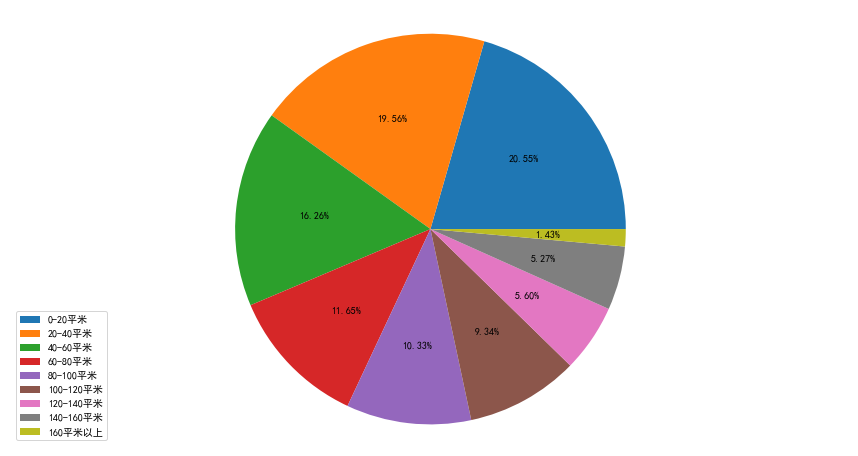

In [31]:
meters_info=df["house_area"]
bins = [0,20,40,60,80,100,120,140,160,200]
labels= ["0-20平米",'20-40平米','40-60平米','60-80平米','80-100平米','100-120平米','120-140平米','140-160平米','160平米以上']
meters_stage=pd.cut(meters_info,bins=bins,labels=labels)

plt.figure(figsize=(15,8))
plt.pie(meters_stage.value_counts().values,autopct='%1.2f%%',shadow=False)
plt.axis('equal')
plt.legend(loc="lower left", labels=labels,bbox_to_anchor=(0,0))
###plt.title("房屋面积的分布")
plt.show()
fig.savefig('图7出租房面积分布饼图2.png')                
fig.savefig('图7出租房面积分布饼图2.pdf')